# **Big Data Analytics Project 3: Semi-Structure Data Analytics**
# Thanarit Kanjanametawat ID:6410322

# 0. Data Ingestion

## 0.1 Read the exported sales collection (JSON file)

In [61]:
import pandas as pd

sales_df = pd.read_json('sales.json', lines=True)
sales_df.head()

,_id,saleDate,items,storeLocation,customer,couponUsed,purchaseMethod
0,{'$oid': '5bd761dcae323e45a93ccfe9'},{'$date': '2015-08-25T10:01:02.918Z'},"[{'name': 'envelopes', 'tags': ['stationary', ...",Seattle,"{'gender': 'M', 'age': 50, 'email': 'keecade@h...",False,Phone
1,{'$oid': '5bd761dcae323e45a93ccfed'},{'$date': '2015-09-02T16:11:59.565Z'},"[{'name': 'binder', 'tags': ['school', 'genera...",London,"{'gender': 'M', 'age': 44, 'email': 'owtar@pu....",False,In store
2,{'$oid': '5bd761dcae323e45a93ccff1'},{'$date': '2014-08-18T04:37:26.849Z'},"[{'name': 'pens', 'tags': ['writing', 'office'...",Denver,"{'gender': 'M', 'age': 57, 'email': 'ohaguwu@n...",False,In store
3,{'$oid': '5bd761dcae323e45a93cd008'},{'$date': '2017-09-14T10:52:42.206Z'},"[{'name': 'backpack', 'tags': ['school', 'trav...",Denver,"{'gender': 'F', 'age': 54, 'email': 'civma@roz...",False,In store
4,{'$oid': '5bd761dcae323e45a93ccfe8'},{'$date': '2015-03-23T21:06:49.506Z'},"[{'name': 'printer paper', 'tags': ['office', ...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online


## 0.2 Observe the features that are needed

In [62]:
sales_df.dtypes

_id               object
saleDate          object
items             object
storeLocation     object
customer          object
couponUsed          bool
purchaseMethod    object
dtype: object

In [63]:
# Find Missing
sales_df.isnull().sum()

_id               0
saleDate          0
items             0
storeLocation     0
customer          0
couponUsed        0
purchaseMethod    0
dtype: int64

### 0.2.1 Customer (Need satisfaction for Query 3 and gender for Query 4)

In [64]:
sales_df['customer'].head()

0    {'gender': 'M', 'age': 50, 'email': 'keecade@h...
1    {'gender': 'M', 'age': 44, 'email': 'owtar@pu....
2    {'gender': 'M', 'age': 57, 'email': 'ohaguwu@n...
3    {'gender': 'F', 'age': 54, 'email': 'civma@roz...
4    {'gender': 'M', 'age': 42, 'email': 'cauho@wit...
Name: customer, dtype: object

In [65]:
type(sales_df['customer'][0])

dict

### 0.2.2 Items (Need name, price, quantity for Query 1, 2)

In [66]:
sales_df['items'].head()

0    [{'name': 'envelopes', 'tags': ['stationary', ...
1    [{'name': 'binder', 'tags': ['school', 'genera...
2    [{'name': 'pens', 'tags': ['writing', 'office'...
3    [{'name': 'backpack', 'tags': ['school', 'trav...
4    [{'name': 'printer paper', 'tags': ['office', ...
Name: items, dtype: object

In [67]:
type(sales_df['items'][0])

list

### 0.2.3 Purchase Method (Need for Query 4)

In [68]:
sales_df['purchaseMethod'].value_counts()

purchaseMethod
In store    2819
Online      1585
Phone        596
Name: count, dtype: int64

In [69]:
type(sales_df['purchaseMethod'][0])

str

### 0.2.4 Sales Date (Need for Query 5)

In [70]:
sales_df['saleDate'].head()

0    {'$date': '2015-08-25T10:01:02.918Z'}
1    {'$date': '2015-09-02T16:11:59.565Z'}
2    {'$date': '2014-08-18T04:37:26.849Z'}
3    {'$date': '2017-09-14T10:52:42.206Z'}
4    {'$date': '2015-03-23T21:06:49.506Z'}
Name: saleDate, dtype: object

In [71]:
type(sales_df['saleDate'][0])

dict

### 0.2.5 Store Location (Need for Query 2, 3)

In [72]:
sales_df['storeLocation'].value_counts()

storeLocation
Denver       1549
Seattle      1134
London        794
Austin        676
New York      501
San Diego     346
Name: count, dtype: int64

In [73]:
type(sales_df['storeLocation'][0])

str

## 0.3 Transformation (Data Preproccessing)

### 0.3.1 Clean customer

In [74]:
def getGender(customer):
    gender = customer["gender"]
    if gender == "M":
        return "Male"
    elif gender == "F":
        return "Female"
    else:
        return "Other"
    
def getSatisfaction(customer):
    return customer["satisfaction"]

sales_df["gender"] = sales_df["customer"].apply(getGender)
sales_df["satisfaction"] = sales_df["customer"].apply(getSatisfaction)
sales_df[["customer", "gender", "satisfaction"]].head(10)

,customer,gender,satisfaction
0,"{'gender': 'M', 'age': 50, 'email': 'keecade@h...",Male,5
1,"{'gender': 'M', 'age': 44, 'email': 'owtar@pu....",Male,2
2,"{'gender': 'M', 'age': 57, 'email': 'ohaguwu@n...",Male,3
3,"{'gender': 'F', 'age': 54, 'email': 'civma@roz...",Female,5
4,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",Male,4
5,"{'gender': 'M', 'age': 30, 'email': 'ziguh@lu....",Male,4
6,"{'gender': 'M', 'age': 26, 'email': 'rapifoozi...",Male,5
7,"{'gender': 'F', 'age': 34, 'email': 'keigutip@...",Female,4
8,"{'gender': 'F', 'age': 40, 'email': 'elusekjiv...",Female,4
9,"{'gender': 'M', 'age': 48, 'email': 'avwa@ud.p...",Male,3


### 0.3.2 Clean items

In [75]:
def getItemList(items):
    item_list = []
    for item in items:
        item_list.append((item["name"], float(item["price"]["$numberDecimal"]) * item["quantity"]))
    return item_list

def getTotalPrice(items):
    total_price = 0
    for item in items:
        total_price += float(item["price"]["$numberDecimal"]) * item["quantity"]
    return total_price

sales_df["item_list"] = sales_df["items"].apply(getItemList)
sales_df["total_price"] = sales_df["items"].apply(getTotalPrice)
sales_df[["items", "item_list", "total_price"]].head(10)

,items,item_list,total_price
0,"[{'name': 'envelopes', 'tags': ['stationary', ...","[(envelopes, 80.5), (binder, 254.79), (notepad...",4405.57
1,"[{'name': 'binder', 'tags': ['school', 'genera...","[(binder, 107.52), (binder, 166.6)]",274.12
2,"[{'name': 'pens', 'tags': ['writing', 'office'...","[(pens, 53.28), (laptop, 1217.84), (notepad, 3...",1946.37
3,"[{'name': 'backpack', 'tags': ['school', 'trav...","[(backpack, 125.34), (printer paper, 38.93), (...",679.35
4,"[{'name': 'printer paper', 'tags': ['office', ...","[(printer paper, 80.02), (notepad, 70.58), (pe...",849.88
5,"[{'name': 'binder', 'tags': ['school', 'genera...","[(binder, 117.74000000000001), (backpack, 714....",904.64
6,"[{'name': 'envelopes', 'tags': ['stationary', ...","[(envelopes, 118.78999999999999), (notepad, 59...",3006.58
7,"[{'name': 'pens', 'tags': ['writing', 'office'...","[(pens, 75.21), (backpack, 305.55), (envelopes...",861.18
8,"[{'name': 'laptop', 'tags': ['electronics', 's...","[(laptop, 3450.96), (envelopes, 40.32), (binde...",3756.07
9,"[{'name': 'printer paper', 'tags': ['office', ...","[(printer paper, 214.20000000000002)]",214.20


### 0.3.3 Clean saleDate

In [76]:
def getSaleMonth(date_dict):
    date_value = date_dict['$date']
    date_object = pd.to_datetime(date_value)
    # %b is for "abbreviated month name"
    return date_object.strftime('%b')

def getSaleYear(date_dict):
    date_value = date_dict['$date']
    date_object = pd.to_datetime(date_value)
    # %b is for "abbreviated month name"
    return date_object.strftime('%Y')

# Apply the custom function to the DataFrame
sales_df['month'] = sales_df['saleDate'].apply(getSaleMonth)
sales_df['year'] = sales_df['saleDate'].apply(getSaleYear)
sales_df[["saleDate", "month", "year"]].head(10)

,saleDate,month,year
0,{'$date': '2015-08-25T10:01:02.918Z'},Aug,2015
1,{'$date': '2015-09-02T16:11:59.565Z'},Sep,2015
2,{'$date': '2014-08-18T04:37:26.849Z'},Aug,2014
3,{'$date': '2017-09-14T10:52:42.206Z'},Sep,2017
4,{'$date': '2015-03-23T21:06:49.506Z'},Mar,2015
5,{'$date': '2015-11-12T12:06:07.052Z'},Nov,2015
6,{'$date': '2017-03-21T01:54:26.657Z'},Mar,2017
7,{'$date': '2015-07-25T07:20:29.804Z'},Jul,2015
8,{'$date': '2016-08-15T04:05:03.298Z'},Aug,2016
9,{'$date': '2017-02-09T12:08:51.353Z'},Feb,2017


### 0.3.4 Get only needed columns

In [77]:
sales_df.head()

,_id,saleDate,items,storeLocation,customer,couponUsed,purchaseMethod,gender,satisfaction,item_list,total_price,month,year
0,{'$oid': '5bd761dcae323e45a93ccfe9'},{'$date': '2015-08-25T10:01:02.918Z'},"[{'name': 'envelopes', 'tags': ['stationary', ...",Seattle,"{'gender': 'M', 'age': 50, 'email': 'keecade@h...",False,Phone,Male,5,"[(envelopes, 80.5), (binder, 254.79), (notepad...",4405.57,Aug,2015
1,{'$oid': '5bd761dcae323e45a93ccfed'},{'$date': '2015-09-02T16:11:59.565Z'},"[{'name': 'binder', 'tags': ['school', 'genera...",London,"{'gender': 'M', 'age': 44, 'email': 'owtar@pu....",False,In store,Male,2,"[(binder, 107.52), (binder, 166.6)]",274.12,Sep,2015
2,{'$oid': '5bd761dcae323e45a93ccff1'},{'$date': '2014-08-18T04:37:26.849Z'},"[{'name': 'pens', 'tags': ['writing', 'office'...",Denver,"{'gender': 'M', 'age': 57, 'email': 'ohaguwu@n...",False,In store,Male,3,"[(pens, 53.28), (laptop, 1217.84), (notepad, 3...",1946.37,Aug,2014
3,{'$oid': '5bd761dcae323e45a93cd008'},{'$date': '2017-09-14T10:52:42.206Z'},"[{'name': 'backpack', 'tags': ['school', 'trav...",Denver,"{'gender': 'F', 'age': 54, 'email': 'civma@roz...",False,In store,Female,5,"[(backpack, 125.34), (printer paper, 38.93), (...",679.35,Sep,2017
4,{'$oid': '5bd761dcae323e45a93ccfe8'},{'$date': '2015-03-23T21:06:49.506Z'},"[{'name': 'printer paper', 'tags': ['office', ...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,Male,4,"[(printer paper, 80.02), (notepad, 70.58), (pe...",849.88,Mar,2015


In [78]:
sales_df = sales_df[["year", "month", "gender", "purchaseMethod", "satisfaction", "storeLocation", "item_list", "total_price"]]
sales_df.head(10)

,year,month,gender,purchaseMethod,satisfaction,storeLocation,item_list,total_price
0,2015,Aug,Male,Phone,5,Seattle,"[(envelopes, 80.5), (binder, 254.79), (notepad...",4405.57
1,2015,Sep,Male,In store,2,London,"[(binder, 107.52), (binder, 166.6)]",274.12
2,2014,Aug,Male,In store,3,Denver,"[(pens, 53.28), (laptop, 1217.84), (notepad, 3...",1946.37
3,2017,Sep,Female,In store,5,Denver,"[(backpack, 125.34), (printer paper, 38.93), (...",679.35
4,2015,Mar,Male,Online,4,Denver,"[(printer paper, 80.02), (notepad, 70.58), (pe...",849.88
5,2015,Nov,Male,In store,4,Denver,"[(binder, 117.74000000000001), (backpack, 714....",904.64
6,2017,Mar,Male,In store,5,New York,"[(envelopes, 118.78999999999999), (notepad, 59...",3006.58
7,2015,Jul,Female,Phone,4,Seattle,"[(pens, 75.21), (backpack, 305.55), (envelopes...",861.18
8,2016,Aug,Female,In store,4,San Diego,"[(laptop, 3450.96), (envelopes, 40.32), (binde...",3756.07
9,2017,Feb,Male,In store,3,Denver,"[(printer paper, 214.20000000000002)]",214.20


# 1. Show top 10 products (name) sales (quantity x price).


## 1.1 Explode(Flatten) the item_list

In [79]:
sales_df.explode("item_list")

,year,month,gender,purchaseMethod,satisfaction,storeLocation,item_list,total_price
0,2015,Aug,Male,Phone,5,Seattle,"(envelopes, 80.5)",4405.57
0,2015,Aug,Male,Phone,5,Seattle,"(binder, 254.79)",4405.57
0,2015,Aug,Male,Phone,5,Seattle,"(notepad, 62.849999999999994)",4405.57
0,2015,Aug,Male,Phone,5,Seattle,"(laptop, 3466.0)",4405.57
0,2015,Aug,Male,Phone,5,Seattle,"(notepad, 132.36)",4405.57
...,...,...,...,...,...,...,...,...
4998,2013,Oct,Male,Online,4,Denver,"(printer paper, 44.84)",843.72
4998,2013,Oct,Male,Online,4,Denver,"(notepad, 142.92)",843.72
4999,2013,May,Male,In store,5,Seattle,"(notepad, 21.01)",1548.40
4999,2013,May,Male,In store,5,Seattle,"(laptop, 1337.46)",1548.40


In [80]:
item_df = sales_df.explode("item_list")[["item_list"]].reset_index(drop=True)
item_df.head(10)

,item_list
0,"(envelopes, 80.5)"
1,"(binder, 254.79)"
2,"(notepad, 62.849999999999994)"
3,"(laptop, 3466.0)"
4,"(notepad, 132.36)"
5,"(printer paper, 37.55)"
6,"(backpack, 166.56)"
7,"(pens, 171.6)"
8,"(envelopes, 33.36)"
9,"(binder, 107.52)"


## 1.2 Seperate item_name and item_price

In [81]:
item_df["item_name"] = item_df["item_list"].apply(lambda x: x[0])
item_df["sales"] = item_df["item_list"].apply(lambda x: x[1])
item_df = item_df[["item_name", "sales"]]
item_df.head(10)

,item_name,sales
0,envelopes,80.50
1,binder,254.79
2,notepad,62.85
3,laptop,3466.00
4,notepad,132.36
5,printer paper,37.55
6,backpack,166.56
7,pens,171.60
8,envelopes,33.36
9,binder,107.52


## 1.3 Aggregate by item_name to find items with the most sales

,sales
item_name,
laptop,6775977.07
backpack,817374.10
pens,581843.27
binder,511644.57
notepad,463615.48
envelopes,376658.49
printer paper,367459.29


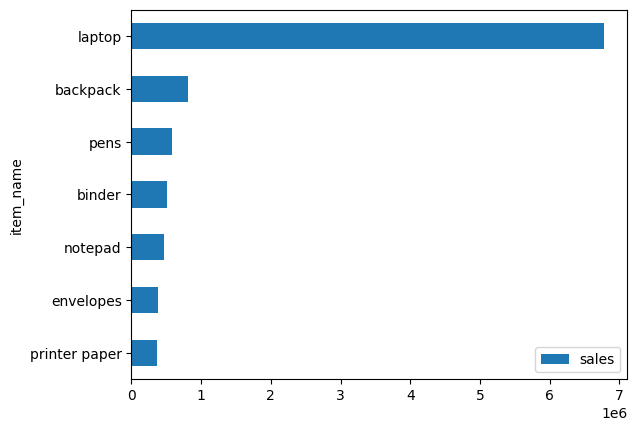

In [82]:
item_df.groupby("item_name").sum().sort_values(by="sales", ascending=True).plot.barh()
item_df.groupby("item_name").sum().sort_values(by="sales", ascending=False)

## According to the graph and table, there are only 7 products in this store. Laptop made the most sales ,making 6775977.07 dollars in total. This is because laptop is more expensive than other products. The second most sales is made by backpack, making 817374.10 dollars in total. The third most sales is made by pen, making 581843.27 dollars in total, followed by binder, notepad, envelopes, and printer paper.

# 2. Show top 3 products (name) sales by store (location).


## 2.1 Explode(Flatten) the item_list

In [83]:
item_df = sales_df.explode("item_list")[["storeLocation", "item_list"]].reset_index(drop=True)
item_df.head(10)

,storeLocation,item_list
0,Seattle,"(envelopes, 80.5)"
1,Seattle,"(binder, 254.79)"
2,Seattle,"(notepad, 62.849999999999994)"
3,Seattle,"(laptop, 3466.0)"
4,Seattle,"(notepad, 132.36)"
5,Seattle,"(printer paper, 37.55)"
6,Seattle,"(backpack, 166.56)"
7,Seattle,"(pens, 171.6)"
8,Seattle,"(envelopes, 33.36)"
9,London,"(binder, 107.52)"


## 2.2 Seperate item_name and item_price

In [84]:
item_df["item_name"] = item_df["item_list"].apply(lambda x: x[0])
item_df["sales"] = item_df["item_list"].apply(lambda x: x[1])
item_df = item_df[["storeLocation", "item_name", "sales"]]
item_df.head(10)

,storeLocation,item_name,sales
0,Seattle,envelopes,80.50
1,Seattle,binder,254.79
2,Seattle,notepad,62.85
3,Seattle,laptop,3466.00
4,Seattle,notepad,132.36
5,Seattle,printer paper,37.55
6,Seattle,backpack,166.56
7,Seattle,pens,171.60
8,Seattle,envelopes,33.36
9,London,binder,107.52


## 2.3 Find Top 3 items in each store

In [85]:
# Aggregate by each storeLocation and item_name to find top 3 items in each store
result = (item_df.groupby(["storeLocation", "item_name"]).sum().
          sort_values(by=["storeLocation", "sales"], ascending=[True, False]).
          groupby("storeLocation").head(3))

result

sales
storeLocation item_name            
Austin        laptop     1018494.05
              backpack    115217.59
              pens         74622.52
Denver        laptop     1961659.25
              backpack    245679.34
              pens        185008.39
London        laptop     1073098.72
              backpack    144529.14
              pens         92602.30
New York      laptop      694613.32
              backpack     82563.14
              pens         64029.90
San Diego     laptop      462973.58
              backpack     50997.42
              pens         42134.55
Seattle       laptop     1565138.15
              backpack    178387.47
              pens        123445.61

## According to the table, Laptop, backpack, and pens are the top 3 items in every store.

## 2.4 Find the top 3 store with the most sales

,sales
storeLocation,
Denver,2392346.98
Seattle,1866971.23
London,1310230.16


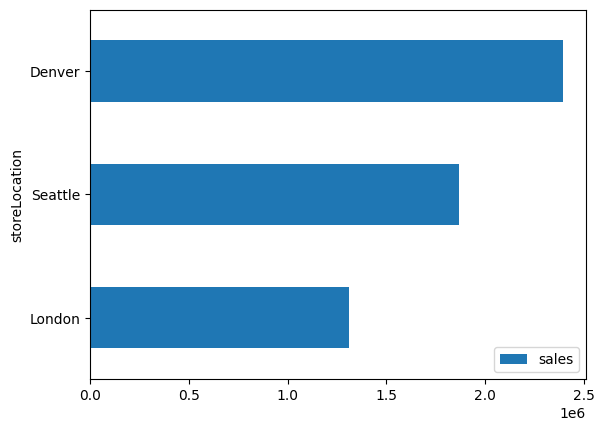

In [86]:
result.groupby("storeLocation").sum().sort_values(by="sales", ascending=False).head(3).sort_values(by="sales", ascending=True).plot.barh()
result.groupby("storeLocation").sum().sort_values(by="sales", ascending=False).head(3)

## According to the graph, The store at Denver made the most sales, followed by Seattle and London Store.

# 3. Show rankings of each store (location).


## This following section is based on the assumption that rankings means the average satisfaction score given by customers (in each transaction) for each store.

## 3.1 Average Satisfaction score for each store 

In [87]:
result = sales_df[["storeLocation", "satisfaction"]].groupby("storeLocation").mean().sort_values(by="satisfaction", ascending=False)

result

,satisfaction
storeLocation,
New York,3.802395
London,3.802267
Denver,3.799871
Seattle,3.790123
San Diego,3.789017
Austin,3.767751


## 3.2 Plot the result

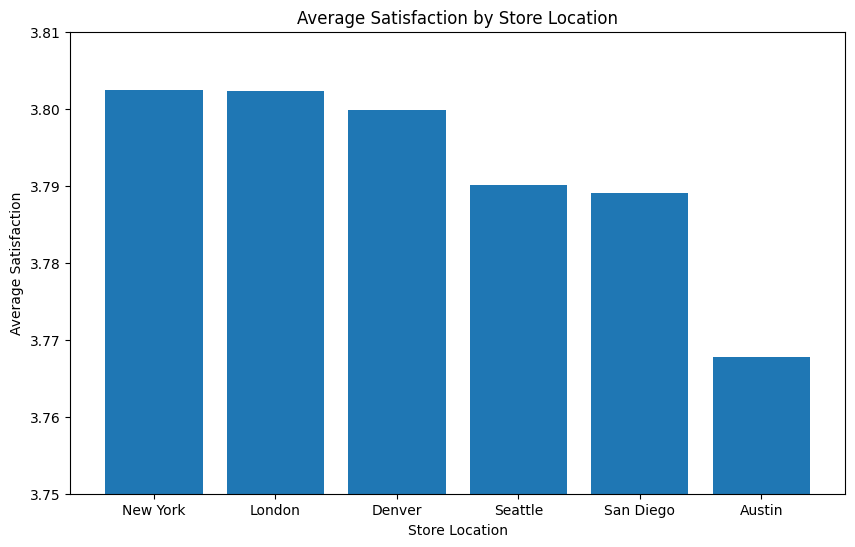

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(result.index, result['satisfaction'])
plt.ylim(3.75, 3.81)
plt.xlabel('Store Location')
plt.ylabel('Average Satisfaction')
plt.title('Average Satisfaction by Store Location')
plt.show()

## According to the graph and table, the store at New York has the highest average satisfaction score which puts the New York store at rank number 1, followed by the store at London and Denver as rank 2 and 3 respectively. Overall, the satisfaction score for every store are pretty much the same.

# 4. Show purchased method by gender table


## 4.1 Perform cross tabulation of Gender and Purchase Method (Online and In-Store)

In [89]:
# cross tabulation the gender and the purchase method (only Online and In-Store)
result = pd.crosstab(sales_df["gender"], sales_df["purchaseMethod"])[["Online", "In store"]]

# Switch row order
result = result.iloc[::-1]
result

purchaseMethod,Online,In store
gender,,
Male,772,1389
Female,813,1430


## 4.2 Plot the result

purchaseMethod,Online,In store
gender,,
Female,0.321725,0.565888
Male,0.312171,0.561666


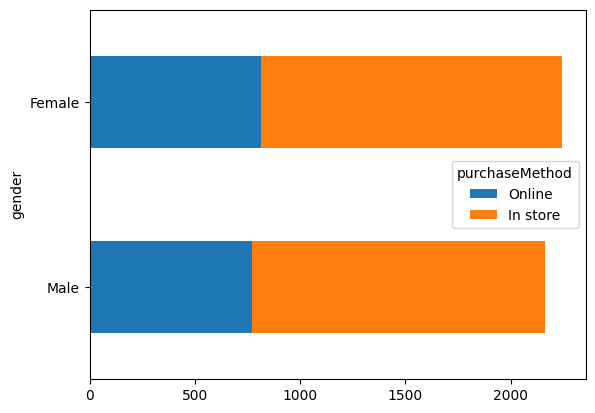

In [90]:
# Plot the result
result.plot.barh(stacked=True)
pd.crosstab(sales_df["gender"], sales_df["purchaseMethod"], normalize='index')[["Online", "In store"]]

## According to the graph, the proportion of those who pay online and in store is about 30% and 55% respectively. This applies to both Male and Female. The rest of the customers (about 15%) pay by the phone method.

# 5. Show monthly total sales


## 5.1 Aggregate by Year and Month and sort the result

In [91]:
# Aggregate by month to find total sales in each month and year
result = sales_df[["year", "month", "total_price"]].groupby(["month", "year"]).sum().reset_index()
# Sort the year and month in order
month_to_num = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Map and sort the month
result['month_num'] = result['month'].map(month_to_num)
result = result.sort_values(by=['year', 'month_num'])

result = result[["year", "month", "total_price"]]

# Rename the column
result = result.rename(columns={"total_price": "total_sales"})
result

,year,month,total_sales
20,2013,Jan,196043.76
15,2013,Feb,147622.59
35,2013,Mar,140700.06
0,2013,Apr,162336.67
40,2013,May,179143.37
30,2013,Jun,142132.02
25,2013,Jul,176298.23
5,2013,Aug,130977.22
55,2013,Sep,137871.99
50,2013,Oct,173126.73


## 5.2 Plot the result

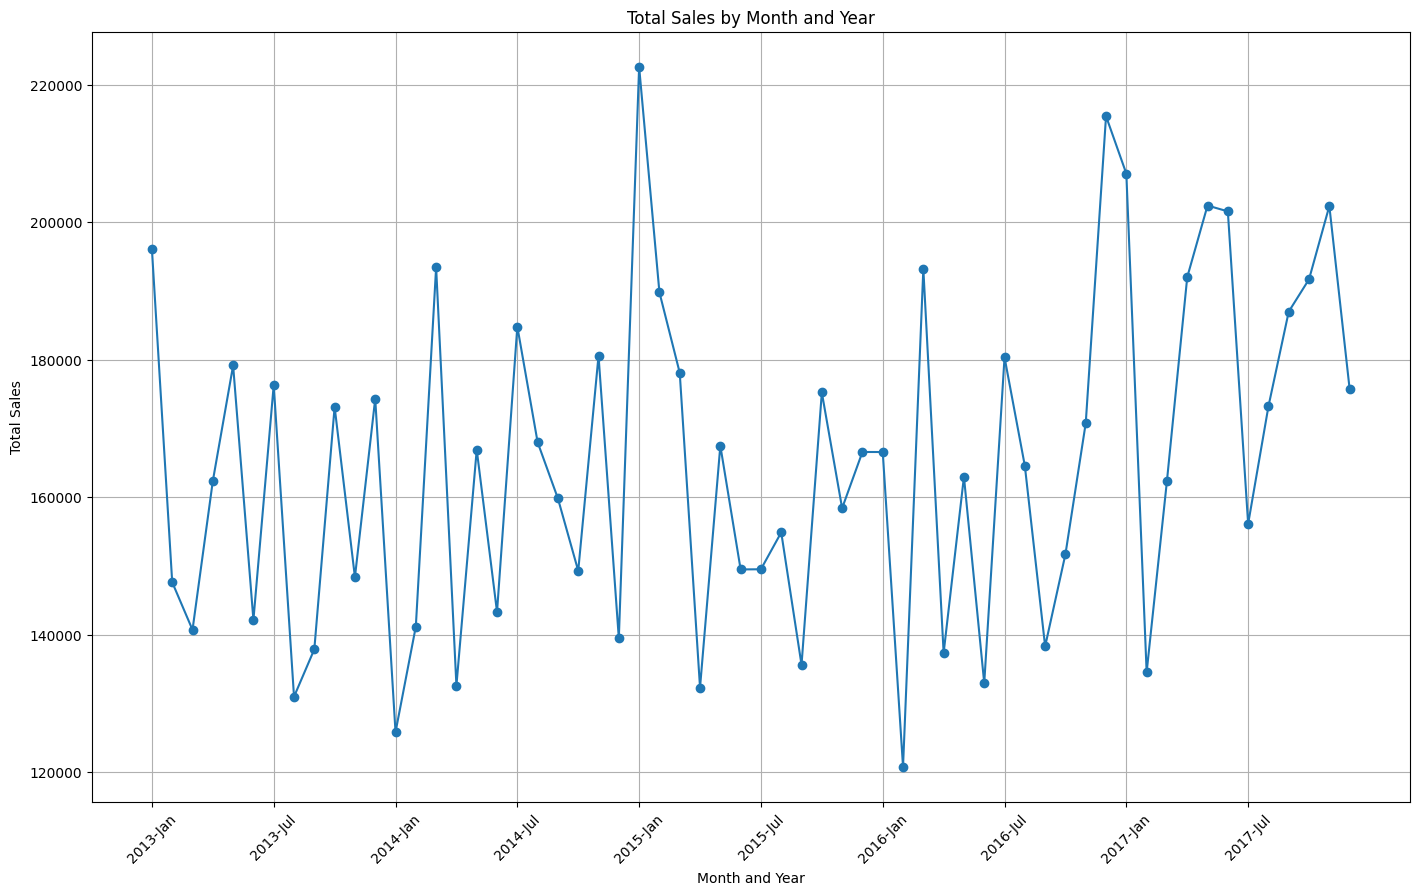

In [92]:
import matplotlib.pyplot as plt

# Create a new column for year and month combined for better x-axis labeling
result['year_month'] = result['year'].astype(str) + '-' + result['month']

plt.figure(figsize=(17, 10))
plt.plot(result['year_month'], result['total_sales'], marker='o')

# Label every 3 months
xticks = result['year_month'].iloc[::6]
plt.xticks(xticks, rotation=45)

plt.title('Total Sales by Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Total Sales')
plt.grid(True)

plt.show()


## According to the graph, The total sales peaked at the beginning of the year 2015 and roughly at the end of the year 2016. 